### Import required libraries

In [183]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')

### Load dataset

In [184]:
data = pd.read_csv("~gosal\\Downloads\\telco-customer-churn\\custchurn.csv")

### Replace all blank cells with NaN

In [185]:
data = data.replace(r'^\s+$', np.nan, regex=True)

### View the first few rows

In [186]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### High level summary of the dataset

In [187]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

### Summary stats of all columns

In [188]:
data.describe(include = 'all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7032,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6530,2
top,8747-UDCOI,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


### Data cleaning

In [189]:
data.SeniorCitizen = data.SeniorCitizen.astype('object')
data.TotalCharges = data.TotalCharges.astype('float')

### Exploratory Data Analysis (EDA) with Seaborn

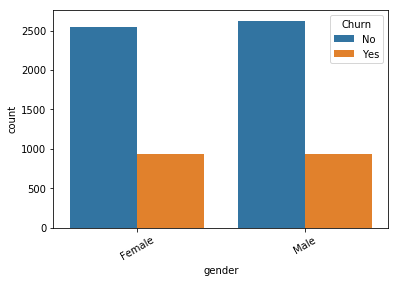

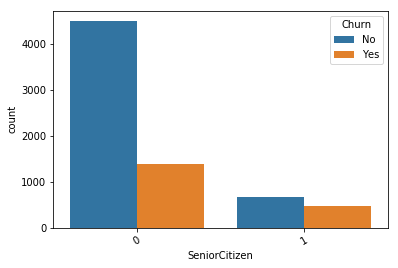

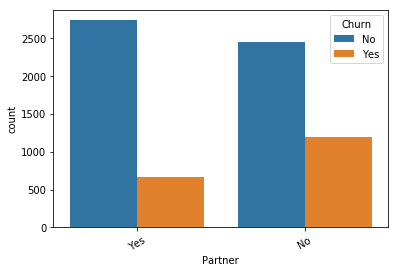

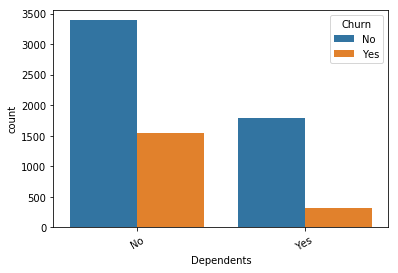

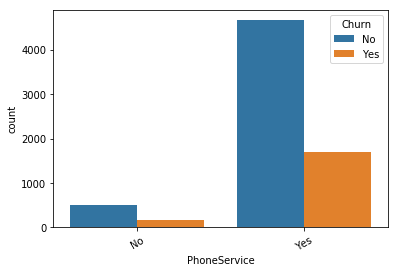

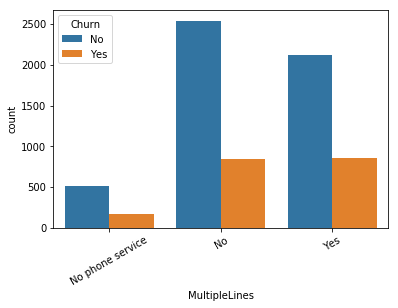

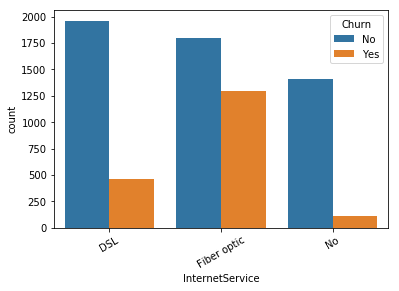

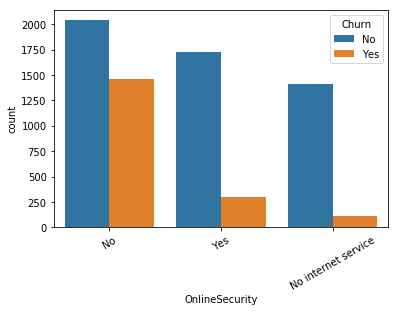

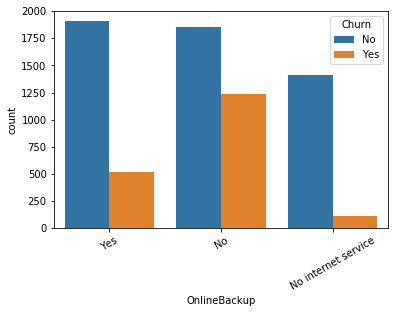

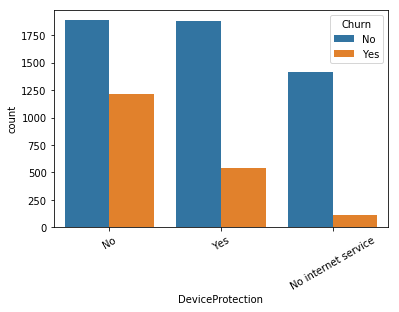

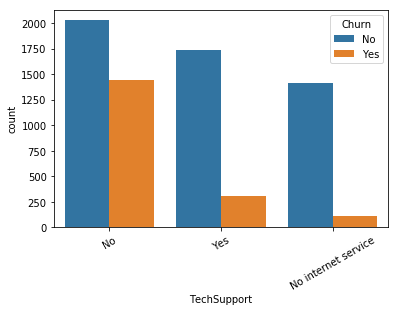

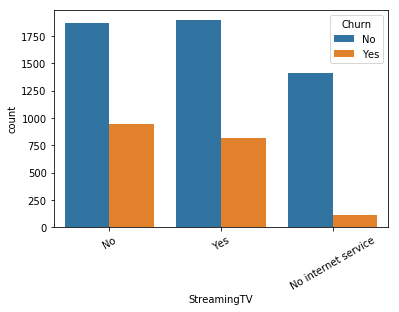

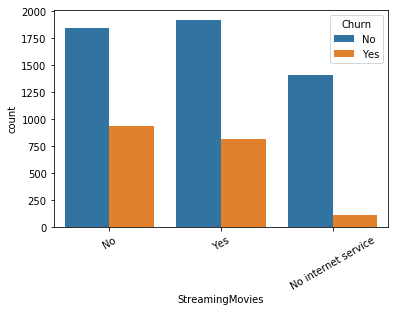

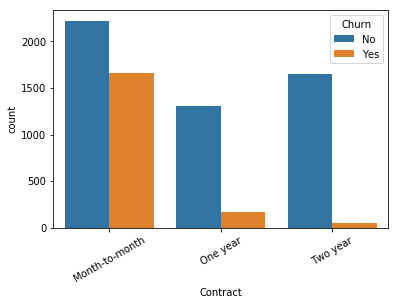

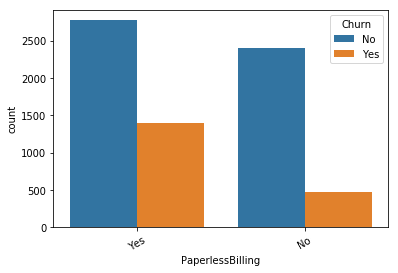

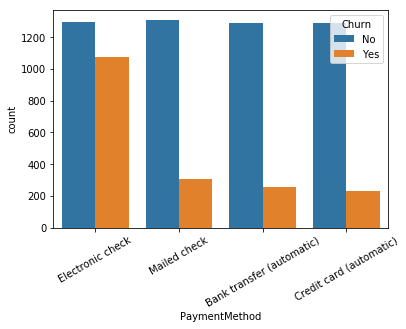

In [190]:
for column in data.columns:
    if ((data[column].dtype == 'O') & (column != "Churn") & (column != "customerID")):
        plt.figure()
        sns.countplot(x = column, hue = 'Churn', data = data)
        plt.xticks(rotation = 30)

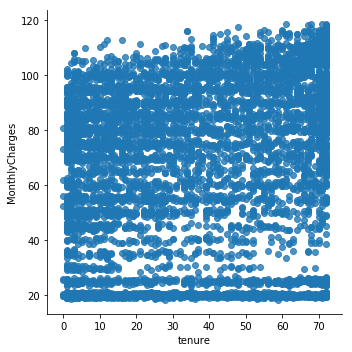

In [191]:
sns.lmplot(x = 'tenure', y = 'MonthlyCharges', data = data, fit_reg = False)

### Plot correlation matrix

In [192]:
corr = data.corr()
corr.style.background_gradient().set_precision(2)

,tenure,MonthlyCharges,TotalCharges
tenure,1,0.25,0.83
MonthlyCharges,0.25,1,0.65
TotalCharges,0.83,0.65,1


### Drop redundant columns

In [193]:
data.drop(['customerID', 'TotalCharges'], axis = 1, inplace = True)

# Predictive Modeling

### Data pre-processing (Encode categorical variables)

In [199]:
datam = pd.get_dummies(data.drop(['Churn'], axis = 1), drop_first = True)

In [200]:
datam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
tenure                                   7043 non-null int64
MonthlyCharges                           7043 non-null float64
gender_Male                              7043 non-null uint8
SeniorCitizen_1                          7043 non-null uint8
Partner_Yes                              7043 non-null uint8
Dependents_Yes                           7043 non-null uint8
PhoneService_Yes                         7043 non-null uint8
MultipleLines_No phone service           7043 non-null uint8
MultipleLines_Yes                        7043 non-null uint8
InternetService_Fiber optic              7043 non-null uint8
InternetService_No                       7043 non-null uint8
OnlineSecurity_No internet service       7043 non-null uint8
OnlineSecurity_Yes                       7043 non-null uint8
OnlineBackup_No internet service         7043 non-null uint8
OnlineBackup_Yes                     

In [201]:
datam['Churn'] = data.Churn
datam.Churn[datam.Churn == 'Yes'] = 1
datam.Churn[datam.Churn == 'No'] = 0
datam.Churn = datam.Churn.astype('int')

### Separate input and output variables

In [202]:
X = datam.drop(['Churn'], axis = 1)
y = datam.Churn

### Split dataset into train and test data

In [203]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 27)

### Logistic Regression

In [204]:
logr = LogisticRegression(random_state = 0)
logr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [205]:
y_pred = logr.predict(X_test)
logr_cfm = confusion_matrix(y_test, y_pred, labels=[0,1])
print(logr_cfm)

[[1399  146]
 [ 255  313]]


In [206]:
print("Accuracy =", round((logr_cfm[0][0] + logr_cfm[1][1])/(logr_cfm[0][0] + logr_cfm[0][1] + logr_cfm[1][0] + logr_cfm[1][1]) * 100,2), '%')
print("Sensitivity =", round((logr_cfm[0][0])/(logr_cfm[0][0] + logr_cfm[0][1]) * 100,2), '%')
print("Specificity =", round((logr_cfm[1][1])/(logr_cfm[1][1] + logr_cfm[1][0]) * 100,2), '%')

Accuracy = 81.02 %
Sensitivity = 90.55 %
Specificity = 55.11 %


In [207]:
k_fold = KFold(n_splits = 5, shuffle = True, random_state = 0)

In [208]:
print("Average 5-Fold CV Accuracy =",round(sum(cross_val_score(logr, X_train, y_train, cv = k_fold, n_jobs = 1))/5*100,2),"%")

Average 5-Fold CV Accuracy = 80.14 %
